In [1]:
%pylab inline

from easy_plot import easy_plot

%load_ext autoreload
%autoreload 2

from pyotf.otf import SheppardPSF, HanserPSF

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.set_cmap("inferno");

<Figure size 432x288 with 0 Axes>

## Difference between models

Because the `HanserPSF` is a mixed frequency space and real space model, with the lateral dimensions being modeled in frequency space and the axial dimension in real space, the results are slightly different from the `SheppardPSF`. In particular, the `HanserPSF` model obeys conservation of energy, meaning that the sum of all values for each $z$ plane is constant. While this is correct in theory it isn't correct in practice because of the finite extent of the simulation. What happens is when the lateral extent is too large the energy get's reflected back towards the center.

Let's look at these directly

In [3]:
# We'll use a 1.27 NA water dipping objective imaging in water
psf_params = dict(na=1.27, ni=1.33, wl=0.561, size=128, vec_corr="none")

# Set the Nyquist sampling rate
nyquist_sampling = psf_params["wl"] / psf_params["na"] / 4

# our oversampling factor, must be odd for easy integration (for peaked symmetrical funtions the kernel must be odd)
oversample_factor = 1

# Over sample to
psf_params["res"] = nyquist_sampling * 0.99 / oversample_factor
psf_params["size"] *= oversample_factor

In [4]:
# calculate 3D
psf_s = SheppardPSF(**psf_params)
psf_h = HanserPSF(**psf_params)

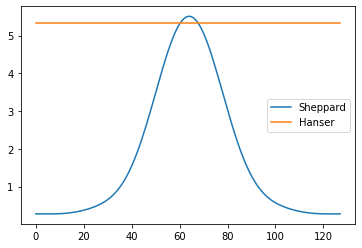

In [5]:
for p, l in zip((psf_s.PSFi, psf_h.PSFi), ("Sheppard", "Hanser")):
    p = p / p.max()
    plot(p.sum((1, 2)), label=l)
legend()

Clearly the `SheppardPSF` model has decreasing energy as the PSF gets spread out. What happens if we normalize it?

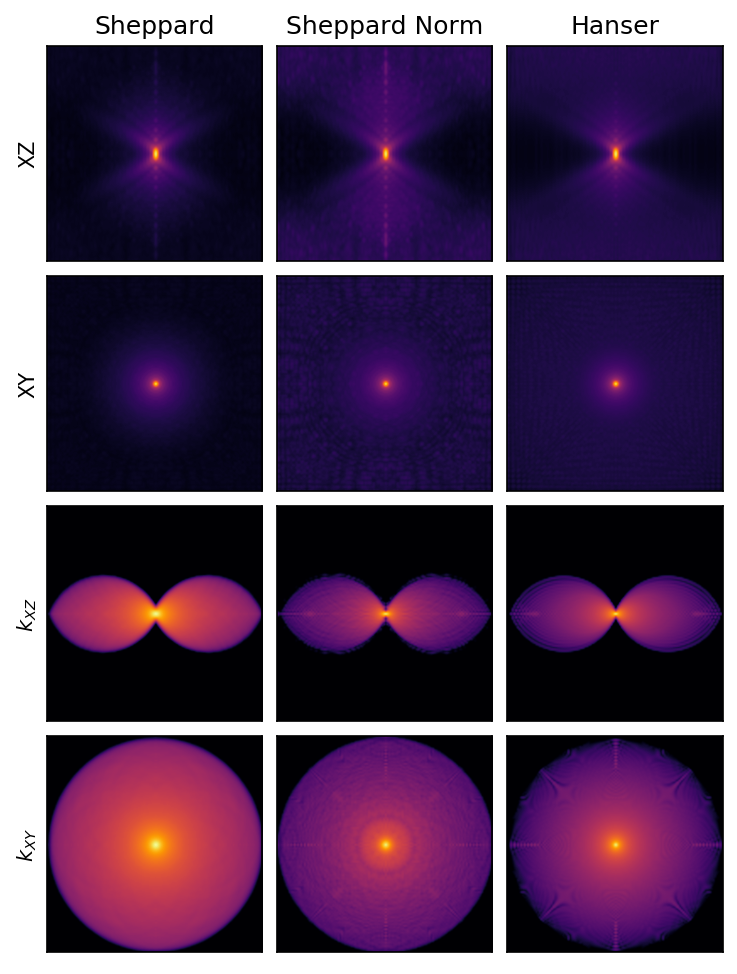

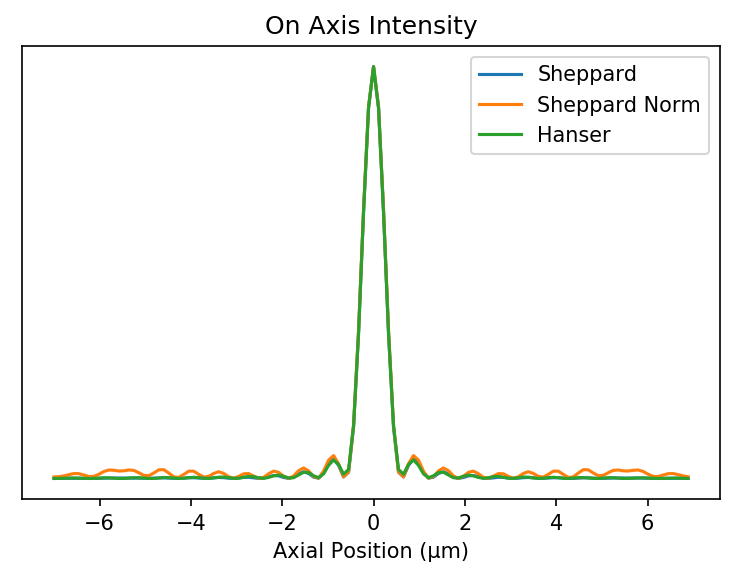

In [6]:
# plot
easy_plot(
    (psf_s.PSFi, psf_s.PSFi / psf_s.PSFi.sum((1, 2), keepdims=True), psf_h.PSFi),
    ("Sheppard", "Sheppard Norm", "Hanser"),
    res=psf_params["res"],
)

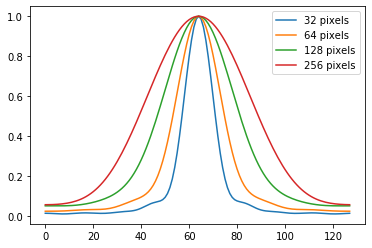

In [7]:
psf_params["zsize"] = 128

for s in (32, 64, 128, 256):
    psf_params["size"] = s
    p = SheppardPSF(**psf_params).PSFi
    p = p.mean((1, 2))
    p = p / p.max()
    plot(p, label=f"{s:} pixels")
legend()

In [8]:
psf_params["zsize"] = 128 * 3
psf_params["size"] = 128
psf_norm = SheppardPSF(**psf_params).PSFi
psf_norm /= psf_norm.sum((1, 2), keepdims=True)
psf_norm = psf_norm[128:-128]

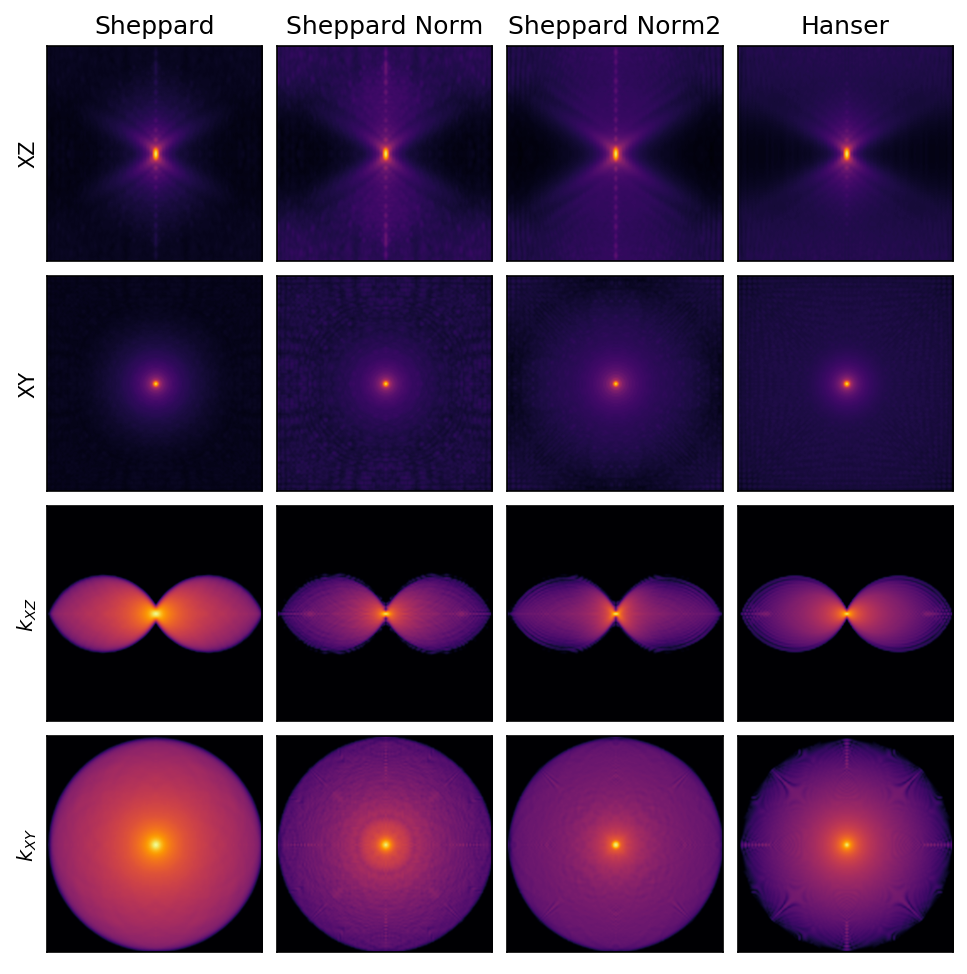

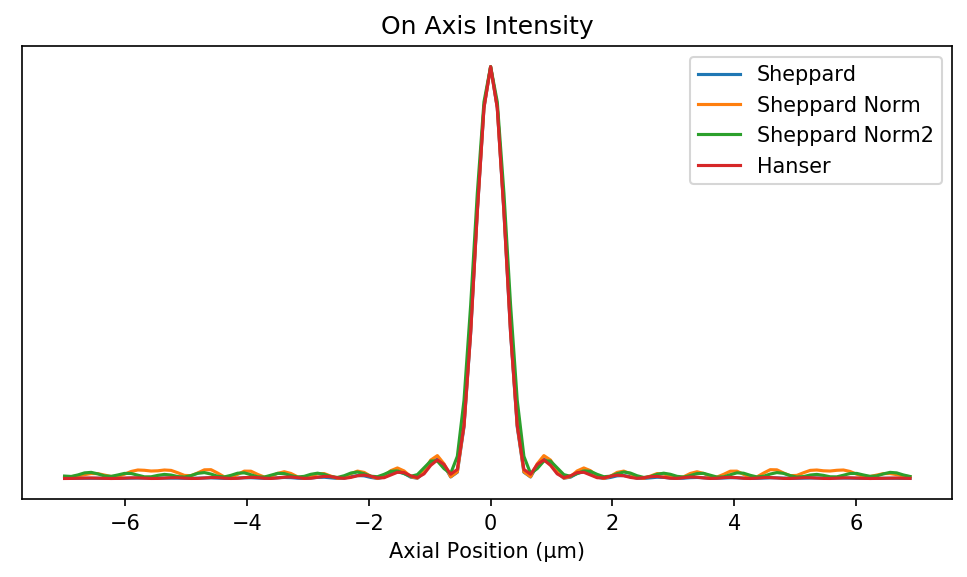

In [9]:
# plot
easy_plot(
    (psf_s.PSFi, psf_s.PSFi / psf_s.PSFi.sum((1, 2), keepdims=True), psf_norm, psf_h.PSFi),
    ("Sheppard", "Sheppard Norm", "Sheppard Norm2", "Hanser"),
    res=psf_params["res"],
)